# Mobius Finances

## The Recent History of the Music Industry

In [2]:
# nbi:hide_in
import ipywidgets as widgets
from ipywidgets import interact
import nbinteract as nbi
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt

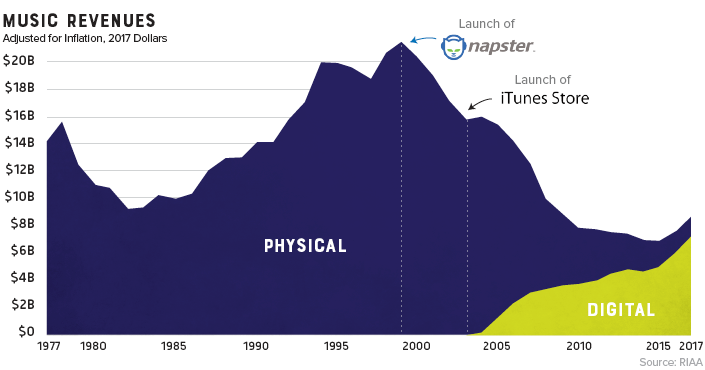

In [3]:
#nbi:hide_in
url1 = 'https://www.ultimate-guitar.com/static/article/draft/90639_M3FvxJgX8JvaPciK_45507.png'
IPython.display.Image(url1, width = 777)

The advent of technology and the ability to stream or download digital music in the early 2000's, with platforms such as Napster and Apple ushering in a new paradigm of distribution, brought with it a moral question to listeners, to buy or pirate. It was surely seen that an increasing amount music listeners felt that music should be almost free, as the next 20 years saw revenues drop steadily as the access to and social acceptibility of illegal downloads became widespread. A few companies have been moderately successful at collecting the pieces of a shocked industry by making it possible to spend around 120 dollars each year to gain unlimited access to tens of millions of streamable songs. Though there is a great population of people spending on average about 32 hours of listening per week each, low costs for listeners that gain access to a huge library has Apple Music only paying $0.00437 per stream (see table below). The artists making a living off of their contributions to the cultural and mental wellbeing of the world have had to certainly make the most of other income streams if they aren't somewhere near the top. To be clear, the streaming platforms are not profitable models, the high cost of licensing music to satisfy consumer demands in addition to the need for per-stream payouts lead to many reporting net loss quarterly.

In [3]:
#nbi:hide_in
def stream_prof(Income):    
    inc = str(int(Income/1000))
    pp = ''
    title_c = pp.join(['Total 1000 Plays Needed to Earn ', inc, ',000 $'])
    perstream = np.array([0.1,0.019, 0.0125, 0.00735, 0.00676, 0.0064, 0.00437, 0.00402, 0.00133, 0.00069])
    tp = Income/perstream
    tot_plays = tp.astype(int)/1000
    
    data = {'Streaming Music Service':['','Napster','TIDAL','Apple Music','Google Play Music','Deezer','Spotify','Amazon','Pandora Premium','Youtube'],
            '$ per Stream':[0,0.019, 0.0125, 0.00735, 0.00676, 0.0064, 0.00437, 0.00402, 0.00133, 0.00069],
            title_c:tot_plays}
    df = pd.DataFrame(data)
    display(df[1:10])

interact(stream_prof,Income=widgets.IntSlider(min=1000,max=100000,step=1000,value=2000));

interactive(children=(IntSlider(value=2000, description='Income', max=100000, min=1000, step=1000), Output()),…

One of the biggest problems with this system of a per-stream payout is that on all platforms, the play of an industry leader's song is worth the same as a play of a musician who reaches only a few thousand plays for most of their songs. Plus, many artists' plays are from people exploring new music that will never return. What Mobius seeks to do is appropriately divert income to artists that are creating high quality music by allowing listeners to more accurately decide where their yearly investment in the music industry goes. The system invisioned creates an incentive for listeners to subscribe to artists for however long they desire, at a relatively low cost, that earns the fan streaming rights and discounted music, merchandise and tickets. This buy, then buy more model allows fans to get a sense for the songs they want to buy outright at the end of their streaming deal, and leads them to buy lower priced merchandise and concert tickets for the time they are really into that artist.

## A Basic Model

To look at a consumer based estimate of potential income, we assume that in a given year there exists well over 150$ of material worth purchasing and begin by estimating a probability distribution of consumer spending within that constraint. Adjust the variables Alpha & Beta that shift the shape of the histogram, then Max_spent that scales it larger or smaller along the x-axis. 

In [5]:
# nbi:hide_in

def beta_samp(Alpha,Beta,Max_spent):
    number = 5000
    ssample = Max_spent * np.random.beta(Alpha,Beta,number)
    income = sum(ssample)
    avg_spent = income/number
    print('Total Spent on Mobius given',5000,'consumers:',round(income,2),'$')
    print('AVG Spent by Fan:',round(avg_spent,2),'$')
    return ssample

opt = {'bins':30,'title': 'Sampling a Distribution of User Spending in 1 Year','xlabel':'$ Spent in Year','xlim':(0,160)}
nbi.hist(beta_samp, options=opt,Alpha=(1,5),Beta=(1,10),Max_spent=(50,150))

### Now projected over 5 years with variable growth
Take the alpha, beta & max_spent values you decided on above and implement them below, this interactive plot shows the projected amount spent on the platform over 5 years given a Beta distribution of consumers. The growth variables:

* The Fan_G variable is a growth rate that relates to how many listeners are adopting the new technology (a value of 1 corresponds to each consumer attracting 1 new consumer the next year), it is assumed that after buying headphones 500 people will be interested enough to spend the equivalent cost of one night out, on content or merchandise, in the first year.

* The Spending_G variable modifies the max_spent variable. A greater than 0 value implies that listeners will start spending more on artists' content once streaming rights and merchandise sales are connected. A smaller variability is expected.

In [11]:
# nbi:hide_in
def x_s(): 
    year = [1]
    for i in np.linspace(1,4,4):
        year_i = 1+i
        year = np.append(year,year_i)
    return year

def y_s(Years,Alpha,Beta,Max_Spent,Fan_G,Spending_G):
    a = Alpha
    b = Beta
    ms = Max_Spent
    g_f = Fan_G
    g_s = Spending_G
    
    sample_1 = np.random.beta(a,b,500)
    sp_1 = np.round(sample_1*ms,2)
    sp = pd.DataFrame(data=[sp_1])
    prof = [sum(sp_1)]
    for i in np.linspace(1,4,4):
        numb_g = int(500*(1+g_f)**i)
        spen_g = int(ms*(1+g_s)**i)
        sample_i = np.random.beta(a,b,numb_g)
        spen = np.round(sample_i*spen_g,2)
        pr_i = sum(spen)
        sp_i = pd.DataFrame([spen])
        prof = np.append(prof,pr_i)
        sp = sp.append(sp_i)
        
    five_yrincome = sum(prof)
    avg_spent_1 = prof[0]/500
    avg_spent_5 = prof[4]/numb_g
    fa = 500
    
    #eq = Equity
    mob_p = prof*.1
    #p1_eq = 15000
    #investment = eq*100*p1_eq
    #yr5_return = .25*investment
    
    print('Profit Array',mob_p)
    print('AVG Spent by Fan in 1st / 5th year:', round(avg_spent_1,2),'$ /',round(avg_spent_5,2),'$')
    print('Number of Fans in 1st / 5th year:',fa,'/',numb_g)
    print('Total Dollars Spent on Mobius in 5 years:',round(five_yrincome,2),'$')
    print('Cummulative Profit through 5 years:',round(0.1*five_yrincome,2),'$')
    return mob_p
    
opts = {
    'xlabel': 'Year',
    'title': 'Mobius Profit ($)',
}

nbi.bar(x_s, y_s, Alpha = (1,5), Beta = (1,10), Max_Spent = (50,150), Fan_G = (0.1,4), Spending_G = (-0.1,0.1,.01), options=opts)

## A look at Expenses, Profits and Revenue

We estimate expected expenses and profits with lower and upper bounds, summing to find varying revenues through the first 3 years. We display the variability in tornado graphs where the expected value is held for all other variables other than the one expressing it's individual potential lower and upper possiblity. This allows one to see the most important costs and expenses to focus on with respect to revenue, and to get an idea of where some leniancy is less critical. 

In [3]:
#nbi:hide_in
#nbi:hide_out
# costs : in the format of arrays, with consecutive entries as year by year estimates
# form of array is [year 1, year 2, year 3]
trav_init_i = np.array([15000,5000,7500])
trav_low_i = np.array([10500,4500,5000])
trav_high_i = np.array([26000,7000,15000])

tech_init_i = np.array([5000,5000,4000])
tech_low_i = np.array([2000,4000,2000])
tech_high_i = np.array([8000,15000,8000])

legal_init_i = np.array([30000,10000,13000])
legal_low_i = np.array([24000,4000,5000])
legal_high_i = np.array([33000,20000,21000])

empl_init_i = np.array([1000,15000,30000])
empl_low_i = np.array([800,12000,15000])
empl_high_i = np.array([1200,20000,50000])

# profits
lic_init_i = np.array([350000,500000,1500000])
lic_low_i = np.array([200000,300000,500000])
lic_high_i = np.array([500000,715000,2250000])

dist_init_i = np.array([5000,24000,40000])
dist_low_i = np.array([2000,8000,22000])
dist_high_i = np.array([17000,55000,90000])

trav = np.append([trav_init_i,trav_low_i],[trav_high_i], axis=0)
tech = np.append([tech_init_i,tech_low_i],[tech_high_i], axis=0)
legal = np.append([legal_init_i,legal_low_i],[legal_high_i], axis=0)
empl = np.append([empl_init_i,empl_low_i],[empl_high_i], axis=0)
lic = np.append([lic_init_i,lic_low_i],[lic_high_i], axis=0)
dist = np.append([dist_init_i,dist_low_i],[dist_high_i], axis=0)

trav = (-1)*trav
tech = (-1)*tech
legal = (-1)*legal
empl = (-1)*empl

# into one array
inputs = np.stack((lic[1],dist[1],tech[1],empl[1],trav[1],legal[1]))
items = [lic,dist,tech,empl,trav,legal]

# formatting and calculating revenue ranges individually
size = len(inputs)
year_base = np.empty([3,size])
for l in range(0,len(inputs[1])):
    for m in range(0,len(inputs)):
        gg = inputs[m][l]
        year_base[l][m] = gg
        
spread = np.empty([3,size])
low_r = np.empty([3,size])
high_r = np.empty([3,size])

for i in range(0,len(items[1])):
    for item in range(0,len(items)):
        spread[i][item] = items[item][2][i] - items[item][1][i]
        low_r[i][item] = sum(year_base[i]) - items[item][0][i] + items[item][1][i]
        high_r[i][item] = sum(year_base[i]) - items[item][0][i] + items[item][2][i]

print('items')
print(items)
print('spread')
print(spread)
print('low_r')
print(low_r)
print('high_r')
print(high_r)
print('year_base')
print(year_base)
print(sum(year_base[0]))
print(sum(year_base[1]))
print(sum(year_base[2]))


## return on investment

items
[array([[ 350000,  500000, 1500000],
       [ 200000,  300000,  500000],
       [ 500000,  715000, 2250000]]), array([[ 5000, 24000, 40000],
       [ 2000,  8000, 22000],
       [17000, 55000, 90000]]), array([[ -5000,  -5000,  -4000],
       [ -2000,  -4000,  -2000],
       [ -8000, -15000,  -8000]]), array([[ -1000, -15000, -30000],
       [  -800, -12000, -15000],
       [ -1200, -20000, -50000]]), array([[-15000,  -5000,  -7500],
       [-10500,  -4500,  -5000],
       [-26000,  -7000, -15000]]), array([[-30000, -10000, -13000],
       [-24000,  -4000,  -5000],
       [-33000, -20000, -21000]])]
spread
[[ 3.00e+05  1.50e+04 -6.00e+03 -4.00e+02 -1.55e+04 -9.00e+03]
 [ 4.15e+05  4.70e+04 -1.10e+04 -8.00e+03 -2.50e+03 -1.60e+04]
 [ 1.75e+06  6.80e+04 -6.00e+03 -3.50e+04 -1.00e+04 -1.60e+04]]
low_r
[[  14700.  161700.  167700.  164900.  169200.  170700.]
 [  83500.  267500.  284500.  286500.  284000.  289500.]
 [-505000.  477000.  497000.  510000.  497500.  503000.]]
high_r
[[ 31

### Year 1: 2020

The first year of business will be focused around continuing to establish a set of healthy licenses with select companies. Initial steps will be to work our targeted group of high-end audio tech suppliers into niches of the market demand. The need for experiential & influencer based marketing, of 4DSound technologies, will be put on those mass producing the devices. Possible collaboration, between the entities involved, may be considered to further spark the growth of the newly created & shared economic space. 

Technological advancement will be crucial to the progress of all aspects of the business, as it develops in parallel to the licensing and creation of hardware. The costs of optimizing app capability, ensuring fluidity and depth of the sound editing interface, upgrades to the server technology and more, will continue to require increased allocation of available funds. Mobius envisions the best available technology as the backbone to the company.

* Travel -- there will be a need for a trip to Hungary for the Development Team, that will cost close to 25,000$.

* Legal -- payments for official documents, the merchant services vendor and unforeseen challenges from competitors threatened by the magnitude of the app.
* Employment -- low estimate of year 1 employment is 0$, this value corresponds with a slow launch. The baseline estimate includes only costs that fuel the growth of the company. The high input, brings in the addition of OddJobs employees and Mobius hired supplemental support for artists (merchandise producers, personalized business advice, ticket sales officers, and more).

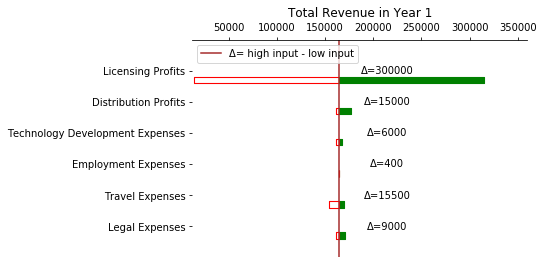

In [16]:
#nbi:hide_in
for year in range(0,1): 
    lowr = low_r[year]
    highr = high_r[year]
    spreadsa = spread[year]
    variables = [
        'Licensing Profits',
        'Distribution Profits',
        'Technology Development Expenses',
        'Employment Expenses',
        'Travel Expenses',
        'Legal Expenses'
    ]

    base = sum(year_base[year])
    lows = lowr
    highs = highr
    values = spreadsa

    #########################################################################
    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom
    
    # Plot the bars
    for y, low, high, value in zip(ys, lows, highs, values):
        # The width of the 'low' and 'high' pieces
        expenselow_width = low - base
        expensehigh_width = base - high 
        profitlow_width = base - low
        profithigh_width = high - base
        
        expense_low = base
        expense_high = high
        profit_low = low
        profit_high = base
        
        # expense
        if (value < 0):
            plt.broken_barh(
                [(expense_low, expenselow_width), (expense_high, expensehigh_width)],
                (y - 0.4, 0.2),
                facecolors=['green', 'white'],  
                edgecolors=['green', 'red'],
                linewidth=1.1,
            )
        # profit
        if (value >= 0):
            plt.broken_barh(
                [(profit_low, profitlow_width), (profit_high, profithigh_width)],
                (y - 0.4, 0.2),
                facecolors=['white', 'green'],  
                edgecolors=['red', 'green'],
                linewidth=1.1,
            )
        
        spr = str(int(abs(high - low)))
        if (base < 0):
            x = 15000
        else:
            x = base + 50000
        
        lab = ''
        lab = lab.join([u'\u0394''=',spr])
        plt.text(x, y, lab, verticalalignment = 'center', horizontalalignment = 'center')

    # vertical line of base expectation and 0
    plt.axvline(base, color='brown')
    plt.axvline(0,marker = ',', color = 'black')

    # graph form
    axes = plt.gca()  # (gca = get current axes)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.xaxis.set_ticks_position('top')

    plt.yticks(ys, variables)
    str_year = str(year+1)
    ti = ''
    ti = ti.join(['Total Revenue in Year ',str_year])
    plt.title(ti)
    plt.legend([u'\u0394= high input - low input'],loc='upper left')
    
    if (lows[0]<0):
        xmin = lows[0] + lows[0]/7
    else:
        xmin = lows[0] - lows[0]/7
    xmax = highs[0] + highs[0]/7
    plt.xlim(xmin, xmax)
    plt.ylim(-1, len(variables))
    plt.show();

### Year 2: 2021

Goal for year 2: full power on the widespread growth stage. After working through many of the first year challenges and fortifying the developing technology, achieve international recognition as the up-and-coming music industry revolution.

Licensing revenue will continue to grow as adoption rates reach escape velocity; this growth is correlated with the accessibility of first-listens and the rate that quality content is produced. Exciting, ear-opening content shared over headphones in a comfortable setting with friends, or free exhibits at festivals/museums/sideshows that provide an enriching, environmental 4D soundscape felt to the bone, will be moments that consumers will buy into the idea of a 4D powered future. 

In year 2, the technology development team will continue to be established and supported based on what skills are deemed important to achieving our vision, given other schedules of growth. 

* Travel -- there is a wide range of possible travel, entirely dependent on what stage of growth Mobius is in. costs include: new 4D studio setup, business trips to develop more sound relationships or new licensing deals (though we'd like to conduct most business over a video chat service, and not fly when we don't have to).
* Legal -- hard to estimate the legal costs of year 2, though at this point we intend to be working with a lawyer on an equity basis. 
* Employment -- simply scaled from slow growth size/cost to high growth.

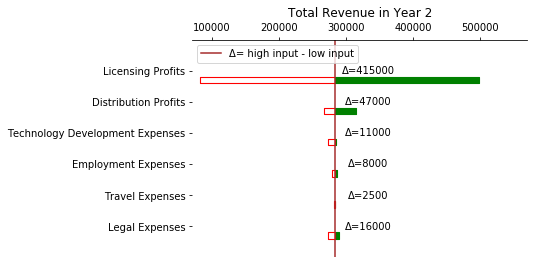

In [9]:
#nbi:hide_in
for year in range(1,2): 
    lowr = low_r[year]
    highr = high_r[year]
    spreadsa = spread[year]
    variables = [
        'Licensing Profits',
        'Distribution Profits',
        'Technology Development Expenses',
        'Employment Expenses',
        'Travel Expenses',
        'Legal Expenses'
    ]

    base = sum(year_base[year])
    lows = lowr
    highs = highr
    values = spreadsa

    #########################################################################
    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom
    
    # Plot the bars
    for y, low, high, value in zip(ys, lows, highs, values):
        # The width of the 'low' and 'high' pieces
        expenselow_width = low - base
        expensehigh_width = base - high 
        profitlow_width = base - low
        profithigh_width = high - base
        
        expense_low = base
        expense_high = high
        profit_low = low
        profit_high = base
        
        # expense
        if (value < 0):
            plt.broken_barh(
                [(expense_low, expenselow_width), (expense_high, expensehigh_width)],
                (y - 0.4, 0.2),
                facecolors=['green', 'white'],  
                edgecolors=['green', 'red'],
                linewidth=1.1,
            )
        # profit
        if (value >= 0):
            plt.broken_barh(
                [(profit_low, profitlow_width), (profit_high, profithigh_width)],
                (y - 0.4, 0.2),
                facecolors=['white', 'green'],  
                edgecolors=['red', 'green'],
                linewidth=1.1,
            )
        
        spr = str(int(abs(high - low)))
        if (base < 0):
            x = 15000
        else:
            x = base + 50000
        
        lab = ''
        lab = lab.join([u'\u0394''=',spr])
        plt.text(x, y, lab, verticalalignment = 'center', horizontalalignment = 'center')

    # vertical line of base expectation and 0
    plt.axvline(base, color='brown')
    plt.axvline(0,marker = ',', color = 'black')

    # graph form
    axes = plt.gca()  # (gca = get current axes)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.xaxis.set_ticks_position('top')

    plt.yticks(ys, variables)
    str_year = str(year+1)
    ti = ''
    ti = ti.join(['Total Revenue in Year ',str_year])
    plt.title(ti)
    plt.legend([u'\u0394= high input - low input'],loc='upper left')
    
    if (lows[0]<0):
        xmin = lows[0] + lows[0]/7
    else:
        xmin = lows[0] - lows[0]/7
    xmax = highs[0] + highs[0]/7
    plt.xlim(xmin, xmax)
    plt.ylim(-1, len(variables))
    plt.show();

### Year 3: 2022

Year 3 has the most variability given that the success or lack thereof is compounded year after year. See the chart describing the planned, successive stages of growth for further understanding of how Mobius intends to establish a stable platform with a well thought out business model. 

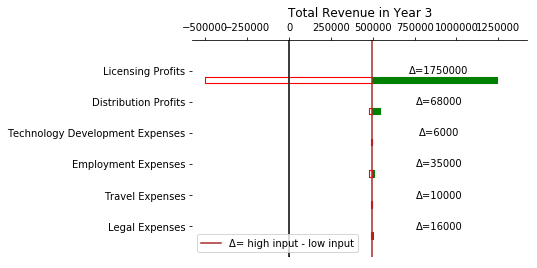

In [15]:
#nbi:hide_in
for year in range(2,3): 
    lowr = low_r[year]
    highr = high_r[year]
    spreadsa = spread[year]
    variables = [
        'Licensing Profits',
        'Distribution Profits',
        'Technology Development Expenses',
        'Employment Expenses',
        'Travel Expenses',
        'Legal Expenses'
    ]

    base = sum(year_base[year])
    lows = lowr
    highs = highr
    values = spreadsa

    #########################################################################
    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom
    
    # Plot the bars
    for y, low, high, value in zip(ys, lows, highs, values):
        # The width of the 'low' and 'high' pieces
        expenselow_width = low - base
        expensehigh_width = base - high 
        profitlow_width = base - low
        profithigh_width = high - base
        
        expense_low = base
        expense_high = high
        profit_low = low
        profit_high = base
        
        # expense
        if (value < 0):
            plt.broken_barh(
                [(expense_low, expenselow_width), (expense_high, expensehigh_width)],
                (y - 0.4, 0.2),
                facecolors=['green', 'white'],  
                edgecolors=['green', 'red'],
                linewidth=1.1,
            )
        # profit
        if (value >= 0):
            plt.broken_barh(
                [(profit_low, profitlow_width), (profit_high, profithigh_width)],
                (y - 0.4, 0.2),
                facecolors=['white', 'green'],  
                edgecolors=['red', 'green'],
                linewidth=1.1,
            )
        
        spr = str(int(abs(high - low)))
        if (base < 0):
            x = 75000
        else:
            x = base + 400000
        
        lab = ''
        lab = lab.join([u'\u0394''=',spr])
        plt.text(x, y, lab, verticalalignment = 'center', horizontalalignment = 'center')

    # vertical line of base expectation and 0
    plt.axvline(base, color='brown')
    plt.axvline(0,marker = ',', color = 'black')

    # graph form
    axes = plt.gca()  # (gca = get current axes)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.xaxis.set_ticks_position('top')

    plt.yticks(ys, variables)
    str_year = str(year+1)
    ti = ''
    ti = ti.join(['Total Revenue in Year ',str_year])
    plt.title(ti)
    plt.legend([u'\u0394= high input - low input'],loc='lower left')
    
    if (lows[0]<0):
        xmin = lows[0] + lows[0]/7
    else:
        xmin = lows[0] - lows[0]/7
    xmax = highs[0] + highs[0]/7
    plt.xlim(xmin, xmax)
    plt.ylim(-1, len(variables))
    plt.show();

# AI Pricing Exploration

I seek to begin looking at how to optimize the pricing of the varying content and merchandise. To understand the potential pitfalls and key markers to include, an in depth simulation must be put together. One that can show: 

* purchases vs profit
* active variability  vs  static prices
* margins from streaming, downloads, merchandise and tickets
* total content available for comparable cost
* ways of exploring different streaming subscriptions (( with genre/tour/Mobius's(or personal selection possible (monthly?))-picks packages available? )) and how they pay off given money saved elsewhere -- where's the balance and how complicated should it be given a variability of savings across the board of possible purchases? where it should be close to impossible to beat the system and figure out the best way to save money, other than rewarding early 'finds' and supporting lesser known artists early in their careers, which is where the variability comes in, like stocks? hot subscriptions may be slightly more expensive though they will be adjusted to maximize profit on a desired time scale, goes to the purchases (quantity) vs profit (quantity x cost), what's better for everyone involved?.. 
* #### the potential ticket fiasco  <<< foreseeing a separate project entirely

## Appendix/Source URL's

* Industry overview: https://redef.com/original/16-years-late-13b-short-but-optimistic-where-growth-will-take-the-music-biz

* (April 30th, 2019) article on Spotify's major issues: https://www.rollingstone.com/music/music-features/a-radical-solution-to-spotifys-biggest-problems-and-the-record-industrys-woes-828663/

* Spotify's recent profitability: https://www.forbes.com/sites/monicamercuri/2019/02/06/spotify-reports-first-quarterly-operating-profit-reaches-96-million-paid-subscribers/#42f04eae5dc9

* Streaming music is big, how do we sell consumers more while granting more specific streaming rights, while allocating stream income more appropriately: 
    * https://www.forbes.com/sites/neilhowe/2019/01/16/how-music-streaming-won-over-millennials/#41e2eaf225c7
    * https://qz.com/1585798/streaming-has-helped-the-music-industry-recover-to-half-of-its-peak-size/
    * https://www.patentlyapple.com/patently-apple/2019/04/streaming-music-now-accounts-for-75-of-music-industry-revenues-.html     
